In [8]:
%matplotlib inline
from scipy import stats

from sklearn.neighbors import KernelDensity
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

In [58]:
random_state = np.random.RandomState(seed=0)
N=2000

#Generate a mix of Cauchy distributions
mu_gamma_f = [(5,1.0,0.1),
              (7,0.5,0.5),
              (9,0.1,0.1),
              (12,0.5,0.2),
              (14,1.0,0.1)]

hx = lambda x: np.sum([f*stats.cauchy(mu,gamma).pdf(x) for (mu,gamma,f) in mu_gamma_f],axis=0)
# def hx(x):
#     x = np.asarray(x)
#     total = np.zeros_like(x, dtype=float)
#     for mu, gamma, f in mu_gamma_f:
#         total += f * stats.cauchy(mu, gamma).pdf(x)
#     return total

x = np.concatenate([stats.cauchy(mu,gamma).rvs(int(f*N),random_state=random_state) for (mu,gamma,f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x>-10]
x = x[x<30]

In [59]:
print(x.tolist())

[8.952596638950636, 6.942533358935216, 11.857502968790328, 7.9673676256550765, 8.339793768997135, 9.104030518710326, 9.03488289822448, 9.00066149734176, 12.068202801788292, 12.43803660691054, 9.171912910373512, 9.32457387753589, 12.793456190615046, 7.649754269389245, 6.957712694613811, 5.212342443874667, -0.5858969407576238, 10.819198381549345, 6.001707605068017, 12.208739158947212, 15.623442221914669, 9.12180574588649, 12.097206156705552, 11.752914357372386, 7.624716805403909, 9.127190737797093, 4.72461107622859, 7.039304136974619, 5.608240319346324, 6.5331353251927435, 6.595590247300794, 14.350048371783956, 6.734318572151493, 7.01540998481395, 9.000751889624222, 5.6912891917117365, 12.940548902826198, 8.951356409071611, 4.261082360738824, 7.074183889581066, 7.773505002260369, 7.599377398071212, 7.578337462319974, 6.661074122722392, 7.032526365073723, 3.70137114216083, 14.14247265328622, 15.2022714128919, 4.756113643850473, 5.3798787765960085, 6.710777342736698, 7.121288020008638, 8.2

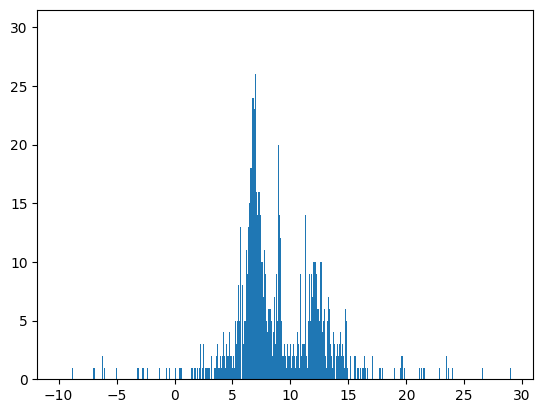

In [60]:
plt.hist(x,bins=1000)
plt.show()

/opt/miniconda3/envs/research/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/research/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/research/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


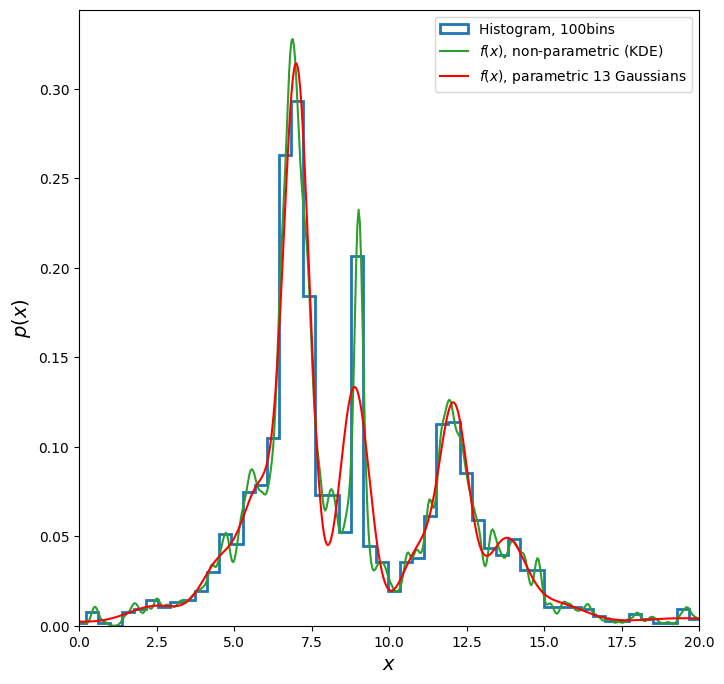

In [74]:
fig,ax = plt.subplots(figsize=(8,8))
xgrid = np.linspace(-10,30,1000)

if False:
    ax.plot(xgrid,hx(xgrid),':',color='black',label="$h(x)$, Generating Distribution")

if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2,label='Histogram, 100bins')
    #ax.hist(x,density=True,color='C1',bins=1000,histtype='step',lw=1,label='Histogram, 1000bins')

# 
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:,None])
    dens_kde = np.exp(kde.score_samples(xgrid[:,None]))
    ax.plot(xgrid,dens_kde,'-',color='C2',label='$f(x)$, non-parametric (KDE)')

# Use gaussian mixture with a predefined number of clusters (13)
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1,1))
    logprob = gmm.score_samples(xgrid.reshape(-1,1))
    fx = lambda j: np.exp(gmm.score_samples(j.reshape(-1,1)))
    ax.plot(xgrid,fx(np.array(xgrid)),'-',color='red',label='$f(x)$, parametric 13 Gaussians')

ax.set_ylabel("$p(x)$",fontsize =14)
ax.set_xlabel("$x$",fontsize=14)
ax.set_xlim(0, 20)
ax.legend()
plt.show()

In [62]:
#hx = lambda x: sum(f*stats.cauchy(mu,gamma).pdf(x)) for (mu,gamma,f) in mu_gamma_f
#hx = lambda x: sum([f*stats.cauchy(mu,gamma).pdf(x) for (mu,gamma,f) in mu_gamma_f])

hx(xgrid)

array([0.00054568, 0.00054819, 0.00055072, 0.00055327, 0.00055583,
       0.00055842, 0.00056102, 0.00056364, 0.00056628, 0.00056894,
       0.00057162, 0.00057432, 0.00057703, 0.00057977, 0.00058253,
       0.0005853 , 0.0005881 , 0.00059092, 0.00059376, 0.00059662,
       0.0005995 , 0.0006024 , 0.00060532, 0.00060826, 0.00061123,
       0.00061422, 0.00061723, 0.00062027, 0.00062332, 0.0006264 ,
       0.00062951, 0.00063263, 0.00063579, 0.00063896, 0.00064216,
       0.00064538, 0.00064863, 0.00065191, 0.00065521, 0.00065853,
       0.00066188, 0.00066526, 0.00066866, 0.00067209, 0.00067555,
       0.00067904, 0.00068255, 0.00068609, 0.00068966, 0.00069325,
       0.00069688, 0.00070054, 0.00070422, 0.00070794, 0.00071168,
       0.00071545, 0.00071926, 0.0007231 , 0.00072697, 0.00073087,
       0.0007348 , 0.00073876, 0.00074276, 0.00074679, 0.00075086,
       0.00075496, 0.00075909, 0.00076326, 0.00076746, 0.0007717 ,
       0.00077598, 0.00078029, 0.00078464, 0.00078903, 0.00079

# Monty Hall Problem

In [89]:
# probability before door openning:
pcar=1/3
pgoat = 2/3
from tqdm.notebook import tqdm

In [146]:
def threedoors(which,ndoors=3):
    labels = np.arange(ndoors) # labels of the doors
    doors = np.zeros(ndoors,dtype=int) # content of doors 0 = goats
    doors[np.random.choice(labels)]=1 # One of the doors has the car
    choice = np.random.choice(labels) #Chosen door
    notchosen = np.delete(labels,choice)

    while True:
        opened = np.random.choice(notchosen) #one door is opened by host
        if doors[opened]==0: #but never the winning door
            other = np.delete(labels,[opened,choice]).item() # other door left
            break

    if which == 'switch':
        return doors[other]
    if which == 'keep':
        return doors[choice]
    if which == 'external': # picking randomly from the 2 doors left
        picked = np.random.choice([choice,other])
        return doors[picked]

In [147]:
N = int(100000)
probs = {}
for which in tqdm(['switch','keep','external']):
    events = [threedoors(which,3) for i in tqdm(range(N))]
    probs[which] = np.sum(events)/N

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

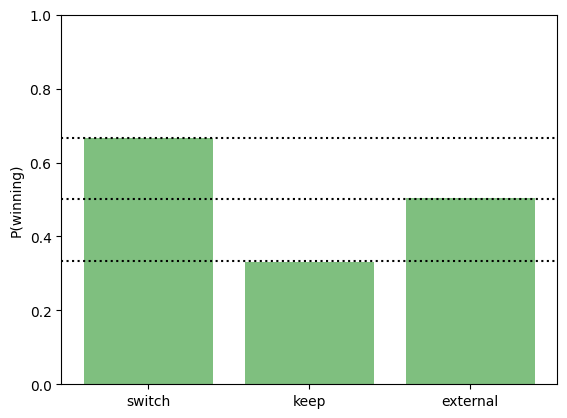

In [148]:
plt.bar([0,1,2], [probs[k] for k in probs.keys()], color='green',alpha=0.5);
plt.xticks([0,1,2], probs.keys());
for y in [1/3,1/2,2/3]:
   plt.axhline(y, ls='dotted',c='black')
plt.ylim(0,1)
plt.ylabel("P(winning)")
plt.show()

In [248]:
labels = np.arange(10) # labels of the doors
doors = np.zeros(10,dtype=int) # content of doors 0 = goats
doors[np.random.choice(labels)]=1 # One of the doors has the car
choice = np.random.choice(labels) #Chosen door
notchosen = np.delete(labels,choice)
print(choice,doors[choice])
print(notchosen,doors[notchosen])

3 0
[0 1 2 4 5 6 7 8 9] [0 0 0 0 0 1 0 0 0]


In [249]:
opened = np.sort(np.random.choice(notchosen,size=10-2,replace=False,))   
print(opened,doors[opened])

[0 1 2 4 5 6 8 9] [0 0 0 0 0 1 0 0]


In [250]:
car=np.where(doors==1)[0]
carless = np.delete(labels,[choice,car[0]])
opened = np.sort(np.random.choice(carless,size=10-2,replace=False,))
print(opened,doors[opened])

[0 1 2 4 5 7 8 9] [0 0 0 0 0 0 0 0]


In [253]:
choice

np.int64(3)

In [266]:
other = np.delete(labels,np.sort(np.append(opened,choice)))
other

array([6])

In [306]:
# General function that solves the issue for severla doors. Host opens N-2 doors, always avoiding the car. 

def doors(which,ndoors=3):
    labels = np.arange(ndoors) # labels of the doors
    doors = np.zeros(ndoors,dtype=int) # content of doors 0 = goats
    doors[np.random.choice(labels)]=1 # One of the doors has the car
    choice = np.random.choice(labels) #Chosen door
    notchosen = np.delete(labels,choice)
    car = np.where(doors==1)[0]
    if choice == car[0]:
        carless = np.delete(labels,[choice])
        opened = np.sort(np.random.choice(carless,size=ndoors-2,replace=False,))
        other = np.delete(labels,np.sort(np.append(opened,choice)))
    else:
        carless = np.delete(labels,np.sort(np.append(choice,car)))
        opened = np.sort(np.random.choice(carless,size=ndoors-2,replace=False,))
        other = np.delete(labels,np.sort(np.append(opened,choice)))
    if which == 'switch':
        return doors[other]
    if which == 'keep':
        return doors[choice]
    if which == 'external': # picking randomly from the 2 doors left
        picked = np.random.choice(np.append(choice,other))
        return doors[picked]

In [303]:
N = int(100000)
ndoors=3
probs = {}
for which in tqdm(['switch','keep','external']):
    events = [doors(which,ndoors) for i in tqdm(range(N))]
    probs[which] = np.sum(events)/N

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

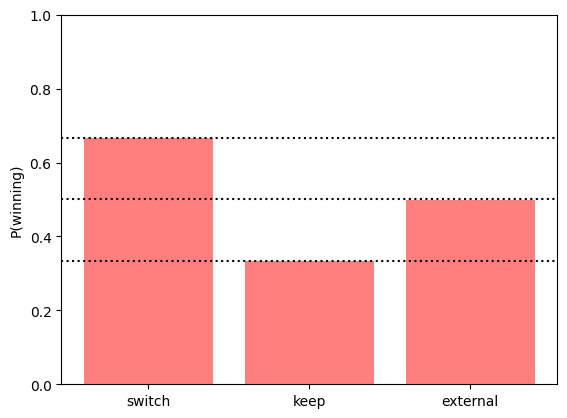

In [304]:
plt.bar([0,1,2], [probs[k] for k in probs.keys()], color='red',alpha=0.5);
plt.xticks([0,1,2], probs.keys());
for y in [1/ndoors,1/2,(ndoors-1)/ndoors]:
   plt.axhline(y, ls='dotted',c='black')
plt.ylim(0,1)
plt.ylabel("P(winning)")
plt.show()

# PDF of the log

In [315]:
un=stats.uniform(0.1,10)

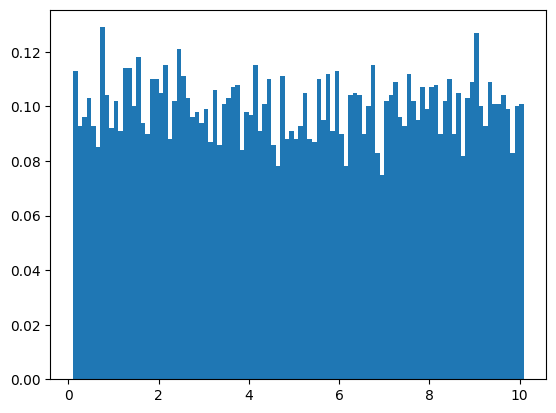

In [336]:
N=10000
x=un.rvs(N)
plt.hist(x,100,density=True)
plt.show()

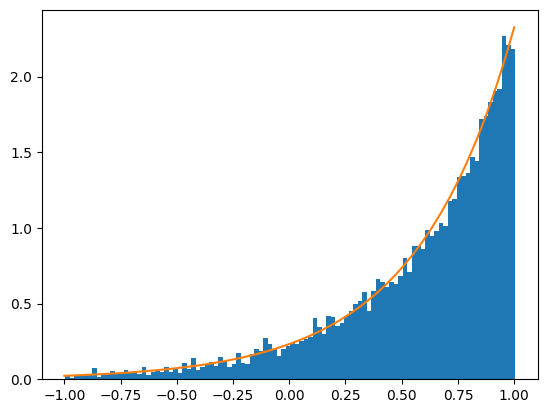

In [339]:
y=np.log10(x)
plt.hist(y,100,density=True)
ygrid = np.linspace(-1,1)
pdf = np.log(10)*np.power(10,ygrid)/9.9
plt.plot(ygrid,pdf)
plt.show()

# PDF transform

$p(y)dy = p(x)dx$

$y=log_{10}(x)$

$\frac{dy}{dx} = \frac{1}{x \ln 10}$

$p(y) = \left |{\frac{dx}{dy}} \right |p(x)$

$p(x) = 1/9.9$

$p(y) = x \ln 10 /9.9 = 10^y \ln 10 / 9.9$

In [322]:
np.log10(np.mean(x))

np.float64(0.7078576837840577)

In [323]:
np.mean(y)

np.float64(0.59105560265534)

In [326]:
np.log10(np.median(x))

np.float64(0.7053907243404158)

In [327]:
np.median(y)

np.float64(0.7053907173193668)

The mean is different for both distributions. The median is the same since that's when the CDF is 0.5 fro both distributions
